### Loading the saved data&target

In [1]:
import numpy as np

data=np.load('dataChestXray.npy')
target=np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


### CNN Architecture

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Using TensorFlow backend.
C:\Users\Ayodhya\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ayodhya\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ayodhya\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

### Splliting the data and target

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

### Training the dataset

In [4]:
history=model.fit(train_data,train_target,epochs=8)


Epoch 1/8
4247/4247 [==============================] - 105s 25ms/step - loss: 0.4872 - accuracy: 0.7827
Epoch 2/8
4247/4247 [==============================] - 98s 23ms/step - loss: 0.2238 - accuracy: 0.9101
Epoch 3/8
4247/4247 [==============================] - 97s 23ms/step - loss: 0.1758 - accuracy: 0.9331
Epoch 4/8
4247/4247 [==============================] - 93s 22ms/step - loss: 0.1536 - accuracy: 0.9430
Epoch 5/8
4247/4247 [==============================] - 96s 23ms/step - loss: 0.1363 - accuracy: 0.9480
Epoch 6/8
4247/4247 [==============================] - 96s 23ms/step - loss: 0.1298 - accuracy: 0.9513
Epoch 7/8
4247/4247 [==============================] - 95s 22ms/step - loss: 0.1097 - accuracy: 0.9597
Epoch 8/8
4247/4247 [==============================] - 99s 23ms/step - loss: 0.1095 - accuracy: 0.9597


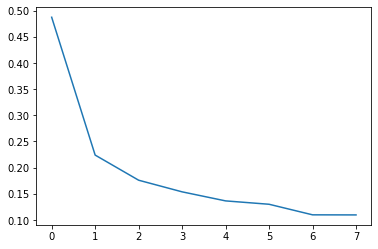

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

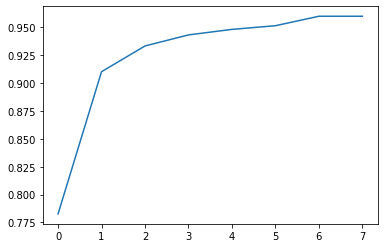

In [6]:
plt.plot(history.history['accuracy'])


In [7]:
print(model.evaluate(test_data,test_target))

1062/1062 [==============================] - 5s 5ms/step
[0.0994923188019607, 0.9632768630981445]


### Saving the model

In [ ]:
model.save("ChestXRayPredictions8epochsDropouts.h5")